# Simple Moving Average Crossover Strategy Demonstration
The code below will demonstrate the simple moving average crossover strategy, which will be integrated with genetic algoritm in "main.py".

As an example, SMA-20 and SMA-200 will be implemented. 


In [154]:
# Import packages
import numpy as np 
import pandas as pd
from pylab import  plt
plt.rcParams["font.family"] = "monospace"


In [155]:
# Import data
raw = raw = pd.read_csv('./tr_eikon_eod_data.csv',
                              index_col=0, parse_dates=True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [156]:
# Select the target ticket and rename the closing price column
symbol = 'AAPL.O'
data = pd.DataFrame(raw[symbol].dropna())
data = data.rename({'AAPL.O': "Close"},axis='columns')
data

,Close
Date,
2010-01-04,30.572827
2010-01-05,30.625684
2010-01-06,30.138541
2010-01-07,30.082827
2010-01-08,30.282827
...,...
2018-06-25,182.170000
2018-06-26,184.430000
2018-06-27,184.160000


In [157]:
## Set the SMA values for two different rolling window sizes
SMA1 = 20
SMA2 = 200

In [158]:
# Calculate 20-day and 200-day moving averages
data['SMA1'] = data['Close'].rolling(SMA1).mean()
data['SMA2'] = data['Close'].rolling(SMA2).mean()
data

,Close,SMA1,SMA2
Date,,,
2010-01-04,30.572827,NaN,NaN
2010-01-05,30.625684,NaN,NaN
2010-01-06,30.138541,NaN,NaN
2010-01-07,30.082827,NaN,NaN
2010-01-08,30.282827,NaN,NaN
...,...,...,...
2018-06-25,182.170000,189.2060,172.0353
2018-06-26,184.430000,189.0325,172.1643
2018-06-27,184.160000,188.8655,172.2776


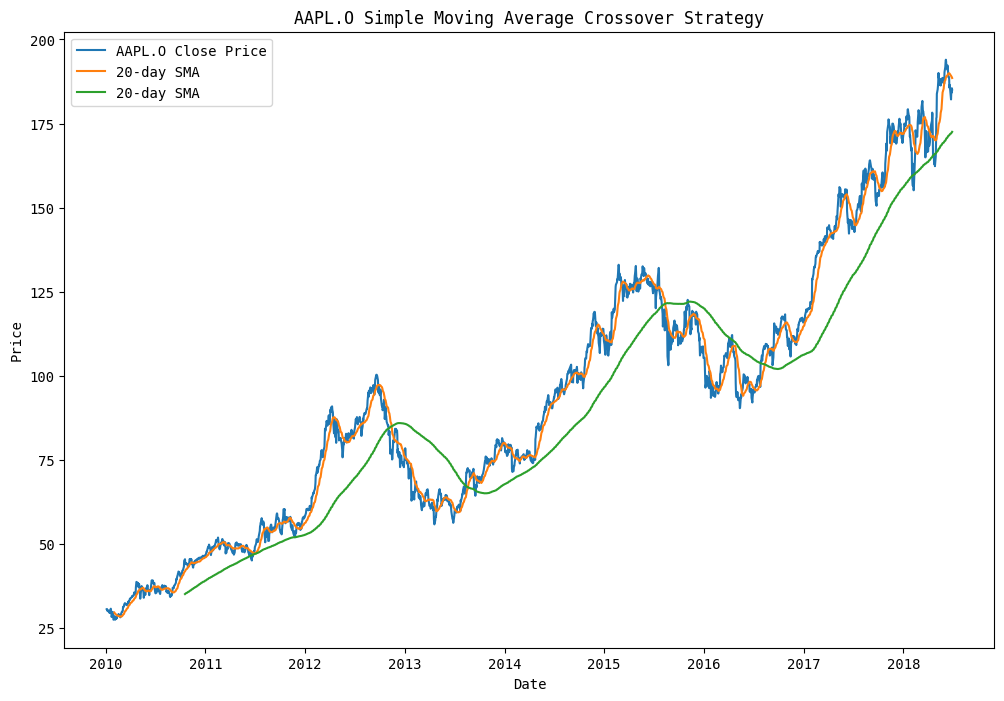

In [159]:
# Plot the closing prices and the two moving averages
plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label=str(symbol)+' Close Price')
plt.plot(data['SMA1'], label= str(SMA1)+'-day SMA')
plt.plot(data['SMA2'], label=str(SMA1)+'-day SMA')
plt.title(str(symbol)+' Simple Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [160]:
# Generate trading signals based on moving average crossover
data['Signal'] = 0
data["Signal"] = np.where(data['SMA1'] > data['SMA2'], 1, 0)

'''
Change of Signal -> Position Value
1, 0 -> -1
0, 1 -> 1
'''
data['Position'] = data['Signal'].diff()

data.head()

,Close,SMA1,SMA2,Signal,Position
Date,,,,,
2010-01-04,30.572827,NaN,NaN,0,NaN
2010-01-05,30.625684,NaN,NaN,0,0.0
2010-01-06,30.138541,NaN,NaN,0,0.0
2010-01-07,30.082827,NaN,NaN,0,0.0
2010-01-08,30.282827,NaN,NaN,0,0.0


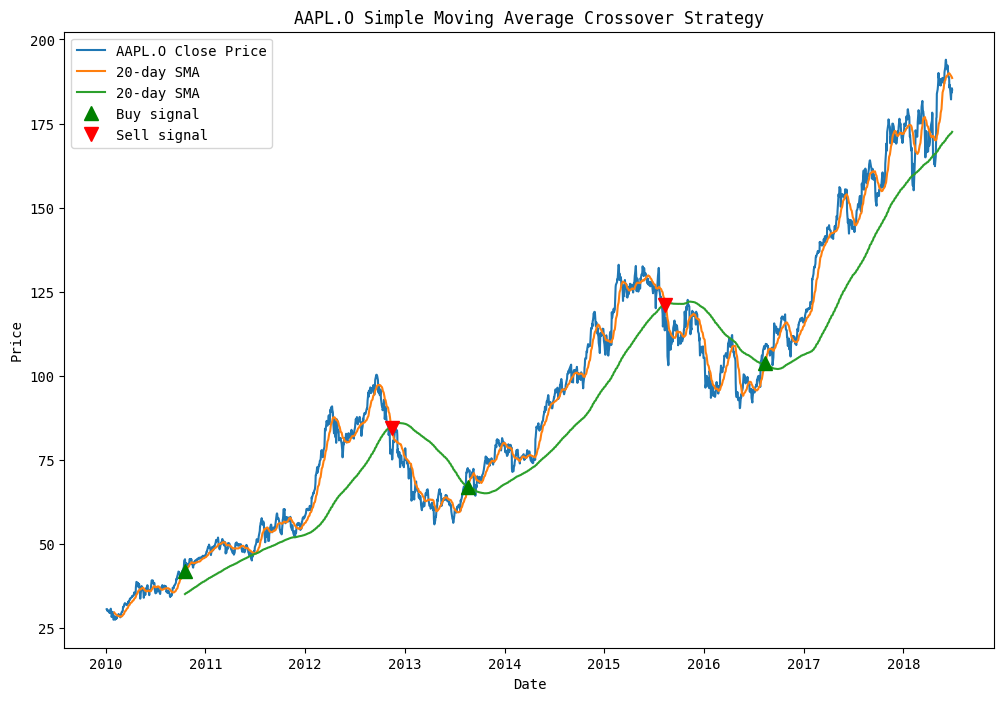

In [161]:
# Visualising the signals
plt.figure(figsize=(12, 8))
plt.plot(data['Close'], label=str(symbol)+' Close Price')
plt.plot(data['SMA1'], label= str(SMA1)+'-day SMA')
plt.plot(data['SMA2'], label=str(SMA1)+'-day SMA')
plt.plot(data[data['Position'] == 1].index, data['SMA1'][data['Position'] == 1], '^', markersize=10, color='g', label='Buy signal')
plt.plot(data[data['Position'] == -1].index, data['SMA1'][data['Position'] == -1], 'v', markersize=10, color='r', label='Sell signal')
plt.title(str(symbol)+' Simple Moving Average Crossover Strategy')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [162]:
# Calculate daily returns
data['Returns'] = data['Close'].pct_change()
# Calculate strategy returns
data['StrategyReturns'] = data['Returns'] * data['Position'].shift(1)
data

,Close,SMA1,SMA2,Signal,Position,Returns,StrategyReturns
Date,,,,,,,
2010-01-04,30.572827,NaN,NaN,0,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,0,0.0,0.001729,NaN
2010-01-06,30.138541,NaN,NaN,0,0.0,-0.015906,-0.0
2010-01-07,30.082827,NaN,NaN,0,0.0,-0.001849,-0.0
2010-01-08,30.282827,NaN,NaN,0,0.0,0.006648,0.0
...,...,...,...,...,...,...,...
2018-06-25,182.170000,189.2060,172.0353,1,0.0,-0.014871,-0.0
2018-06-26,184.430000,189.0325,172.1643,1,0.0,0.012406,0.0
2018-06-27,184.160000,188.8655,172.2776,1,0.0,-0.001464,-0.0


In [163]:
# Calculate cumulative returns for the strategy and buy-and-hold
data['CumulativeStrategyReturns'] = (1 + data['StrategyReturns']).cumprod()
data['CumulativeBuyHoldReturns'] = (1 + data['Returns']).cumprod()
data

,Close,SMA1,SMA2,Signal,Position,Returns,StrategyReturns,CumulativeStrategyReturns,CumulativeBuyHoldReturns
Date,,,,,,,,,
2010-01-04,30.572827,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN
2010-01-05,30.625684,NaN,NaN,0,0.0,0.001729,NaN,NaN,1.001729
2010-01-06,30.138541,NaN,NaN,0,0.0,-0.015906,-0.0,1.000000,0.985795
2010-01-07,30.082827,NaN,NaN,0,0.0,-0.001849,-0.0,1.000000,0.983973
2010-01-08,30.282827,NaN,NaN,0,0.0,0.006648,0.0,1.000000,0.990514
...,...,...,...,...,...,...,...,...,...
2018-06-25,182.170000,189.2060,172.0353,1,0.0,-0.014871,-0.0,1.001089,5.958559
2018-06-26,184.430000,189.0325,172.1643,1,0.0,0.012406,0.0,1.001089,6.032481
2018-06-27,184.160000,188.8655,172.2776,1,0.0,-0.001464,-0.0,1.001089,6.023650


# End
